In [5]:
import requests
import pandas as pd

# URL base de la API de RAWG
url_base = "https://api.rawg.io/api"

# Endpoint para obtener la lista de juegos
endpoint = "/games"

# Tu clave de API obtenida de RAWG
api_key = "02d292424b944e6081c0c8bdcee20fbe"

# Número de juegos que deseas obtener (máximo 1000 según la documentación de la API)
num_games = 500

# Realizar la solicitud a la API para obtener los primeros 100 juegos
url = f"{url_base}{endpoint}?key={api_key}&page_size={num_games}"
response = requests.get(url)

# Verificar el estado de la respuesta
if response.status_code == 200:
    # Obtener los datos en formato JSON
    data = response.json()

    # Crear un DataFrame con los primeros 100 juegos
    df_games = pd.DataFrame(data["results"])

    # Limpiar columnas y quedarse solo con las columnas deseadas
    columns_to_keep = ["name", "released", "rating", "metacritic", "genres", "platforms"]
    df_games_cleaned = df_games[columns_to_keep]

    # Convertir la columna "released" a tipo de datos de fecha
    df_games_cleaned["released"] = pd.to_datetime(df_games_cleaned["released"])

    # Función para extraer los nombres de las plataformas y convertirlos en una cadena separada por comas
    def extract_platform_names(platform_list):
        return ", ".join([platform["platform"]["name"] for platform in platform_list])

    # Aplicar la función a la columna "platforms" y reemplazar los datos originales
    df_games_cleaned["platforms"] = df_games_cleaned["platforms"].apply(extract_platform_names)

    # Función para extraer los nombres de los géneros y convertirlos en una cadena separada por comas
    def extract_genre_names(genre_list):
        return ", ".join([genre["name"] for genre in genre_list])

    # Aplicar la función a la columna "genres" y reemplazar los datos originales
    df_games_cleaned["genres"] = df_games_cleaned["genres"].apply(extract_genre_names)

    # Eliminar filas con valores nulos o vacíos
    df_games_cleaned.dropna(inplace=True)

    # Eliminar filas duplicadas
    df_games_cleaned.drop_duplicates(inplace=True)

    # Cambiar el formato de la columna "released" para que muestre solo el año
    df_games_cleaned["released"] = df_games_cleaned["released"].dt.year

    # Ajustar la configuración de visualización para mostrar todas las columnas
    pd.set_option("display.max_columns", None)
    pd.set_option("display.max_colwidth", 1000)


else:
    print("Error en la solicitud:", response.status_code)


C:\Users\Admin\AppData\Local\Temp\ipykernel_11412\3120446811.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_cleaned["released"] = pd.to_datetime(df_games_cleaned["released"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_11412\3120446811.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_cleaned["platforms"] = df_games_cleaned["platforms"].apply(extract_platform_names)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11412\3120446811.py:47: SettingWithCopyWarning: 
A value is trying to be

In [9]:
df_games_cleaned

,name,released,rating,metacritic,genres,platforms
0,Grand Theft Auto V,2013,4.47,92.0,"Action, Adventure","PlayStation 5, Xbox Series S/X, PlayStation 4, PC, PlayStation 3, Xbox 360, Xbox One"
1,The Witcher 3: Wild Hunt,2015,4.66,92.0,"Action, Adventure, RPG","Xbox Series S/X, PlayStation 4, Nintendo Switch, PC, Xbox One, PlayStation 5"
2,Portal 2,2011,4.61,95.0,"Shooter, Puzzle","Xbox 360, Linux, macOS, PlayStation 3, PC, Xbox One"
3,Tomb Raider (2013),2013,4.05,86.0,"Action, Adventure","PlayStation 4, macOS, PC, Xbox One, Xbox 360, PlayStation 3"
4,Counter-Strike: Global Offensive,2012,3.57,81.0,"Action, Shooter","PC, Xbox 360, PlayStation 3"
5,Portal,2007,4.51,90.0,"Adventure, Puzzle","Android, PlayStation 3, Xbox 360, Linux, macOS, PC, Nintendo Switch"
6,Left 4 Dead 2,2009,4.09,89.0,"Action, Shooter","macOS, Linux, PC, Xbox 360"
7,The Elder Scrolls V: Skyrim,2011,4.42,94.0,"Action, RPG","PC, Nintendo Switch, Xbox 360, PlayStation 3"
8,BioShock Infinite,2013,4.39,94.0,"Action, Shooter","PlayStation 4, Xbox 360, Nintendo Switch, Linux, PC, PlayStation 3, Xbox One"
9,Red Dead Redemption 2,2018,4.59,96.0,"Action, Adventure","PC, PlayStation 4, Xbox One"


                               name  released  rating  metacritic  \
0                Grand Theft Auto V      2013    4.47        92.0   
1          The Witcher 3: Wild Hunt      2015    4.66        92.0   
2                          Portal 2      2011    4.61        95.0   
3                Tomb Raider (2013)      2013    4.05        86.0   
4  Counter-Strike: Global Offensive      2012    3.57        81.0   

                   genres  \
0       Action, Adventure   
1  Action, Adventure, RPG   
2         Shooter, Puzzle   
3       Action, Adventure   
4         Action, Shooter   

                                                                              platforms  
0  PlayStation 5, Xbox Series S/X, PlayStation 4, PC, PlayStation 3, Xbox 360, Xbox One  
1          Xbox Series S/X, PlayStation 4, Nintendo Switch, PC, Xbox One, PlayStation 5  
2                                   Xbox 360, Linux, macOS, PlayStation 3, PC, Xbox One  
3                           PlayStation 4, macOS, 

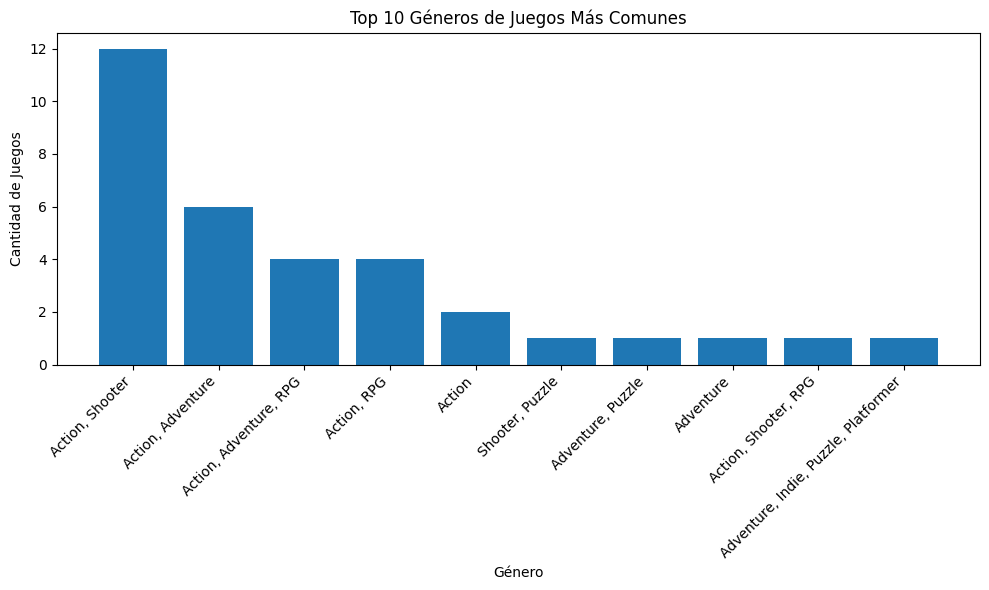

In [10]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# ... (tu código para obtener los datos y limpiar el DataFrame)

# Revisar los primeros registros del DataFrame
print(df_games_cleaned.head())

# Resumen estadístico de las columnas numéricas
print(df_games_cleaned.describe())

# Contar la cantidad de juegos por género
genre_counts = df_games_cleaned["genres"].value_counts()

# Graficar los 10 géneros más comunes en un gráfico de barras
top_genres = genre_counts.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_genres.index, top_genres.values)
plt.xlabel("Género")
plt.ylabel("Cantidad de Juegos")
plt.title("Top 10 Géneros de Juegos Más Comunes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()